<a href="https://colab.research.google.com/github/Sriharish19/SH-Supervised-ML-Cardiovascular-Risk-Prediction/blob/main/SH_Supervised_ML_Classification_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_recall_curve,auc,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

import math

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# Reading the CSV file
df = pd.read_csv('/content/Mydrive/MyDrive/Capstone project 4- Cardio vascular risk prediction/data_cardiovascular_risk.csv')

In [5]:
data = df

In [6]:
# Shape
df.shape

(3390, 17)

In [7]:
# Head
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
#Tail
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [9]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
# Duplicates
df.duplicated().sum()

0

In [14]:

# Null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [15]:
# Replacing 'M' with 1 and 'F' with 0 in 'sex' variable

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

# Replacing 'YES' with 1 and 'NO' with 0 in 'is_smoking' variable

df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

In [16]:
# Treating NULL values
# 'education'
df['education'].fillna(0,inplace = True)
df.groupby('education').agg({'age':'mean'})
# print(df.groupby('education').agg({'age':'mean'}))
# From this we can replace education '0' with '1' because based on the age the education varies.
df['education'] = df['education'].apply(lambda x : 1 if x == 0 else x)

# 'cigsPerDay'
df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'})
# print(df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'}))
# As the average number of cigarettes consumed by Females is 14 and Males is 22
# So replacing null values with 14 for smoking female patients and 22 for smoking male patients.
df.loc[(df.sex == 0) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  14
df.loc[(df.sex == 1) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  22

# 'totChol'
df['totChol'].fillna(int(df['totChol'].mean()), inplace = True)

# 'BMI'
df['BMI'].fillna(int(df['BMI'].mean()), inplace = True)

# 'Heart rate'
df['heartRate'].fillna(int(df['heartRate'].mean()), inplace = True)


# 'glucose'
df.groupby('diabetes').agg({'glucose':'mean'})
# print(df.groupby('diabetes').agg({'glucose':'mean'}))
# Average Glucose level of Patients without Diabetes is 79 and with Diabetes is 172
# So replacing null values with 79 for patients without diabetes and 172 for patients with diabetes.
df.loc[ (df.diabetes == 0) & (df['glucose'].isna()), 'glucose'] =  79
df.loc[ (df.diabetes == 1) & (df['glucose'].isna()), 'glucose'] =  172

# 'BPMeds'
df.loc[(df.prevalentHyp == 1) & (df['BPMeds'].isna()), 'BPMeds'] =  1

In [17]:
# Droping the rows with 'BPMeds' as Nan value
df = df.dropna()
df.shape

(3365, 17)

In [18]:
# Summary
round(df.describe([0.95,0.99],include = 'all'),2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3365.00,3365.00,3365.00,3365.00,3365.0,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00
mean,1695.31,49.53,1.95,0.43,0.5,9.11,0.04,0.01,0.32,0.03,237.12,132.67,82.93,25.80,75.98,81.92,0.15
std,978.64,8.59,1.02,0.50,0.5,11.85,0.18,0.08,0.47,0.16,44.98,22.34,12.04,4.11,11.99,23.37,0.36
min,0.00,32.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
50%,1694.00,49.00,2.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,235.00,128.50,82.00,25.38,75.00,79.00,0.00
95%,3219.80,64.00,4.00,1.00,1.0,30.00,0.00,0.00,1.00,0.00,313.00,175.90,105.00,32.84,98.00,108.00,1.00
99%,3355.36,67.00,4.00,1.00,1.0,43.00,1.00,0.00,1.00,1.00,354.36,202.18,119.36,38.87,110.00,173.00,1.00
max,3389.00,70.00,4.00,1.00,1.0,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


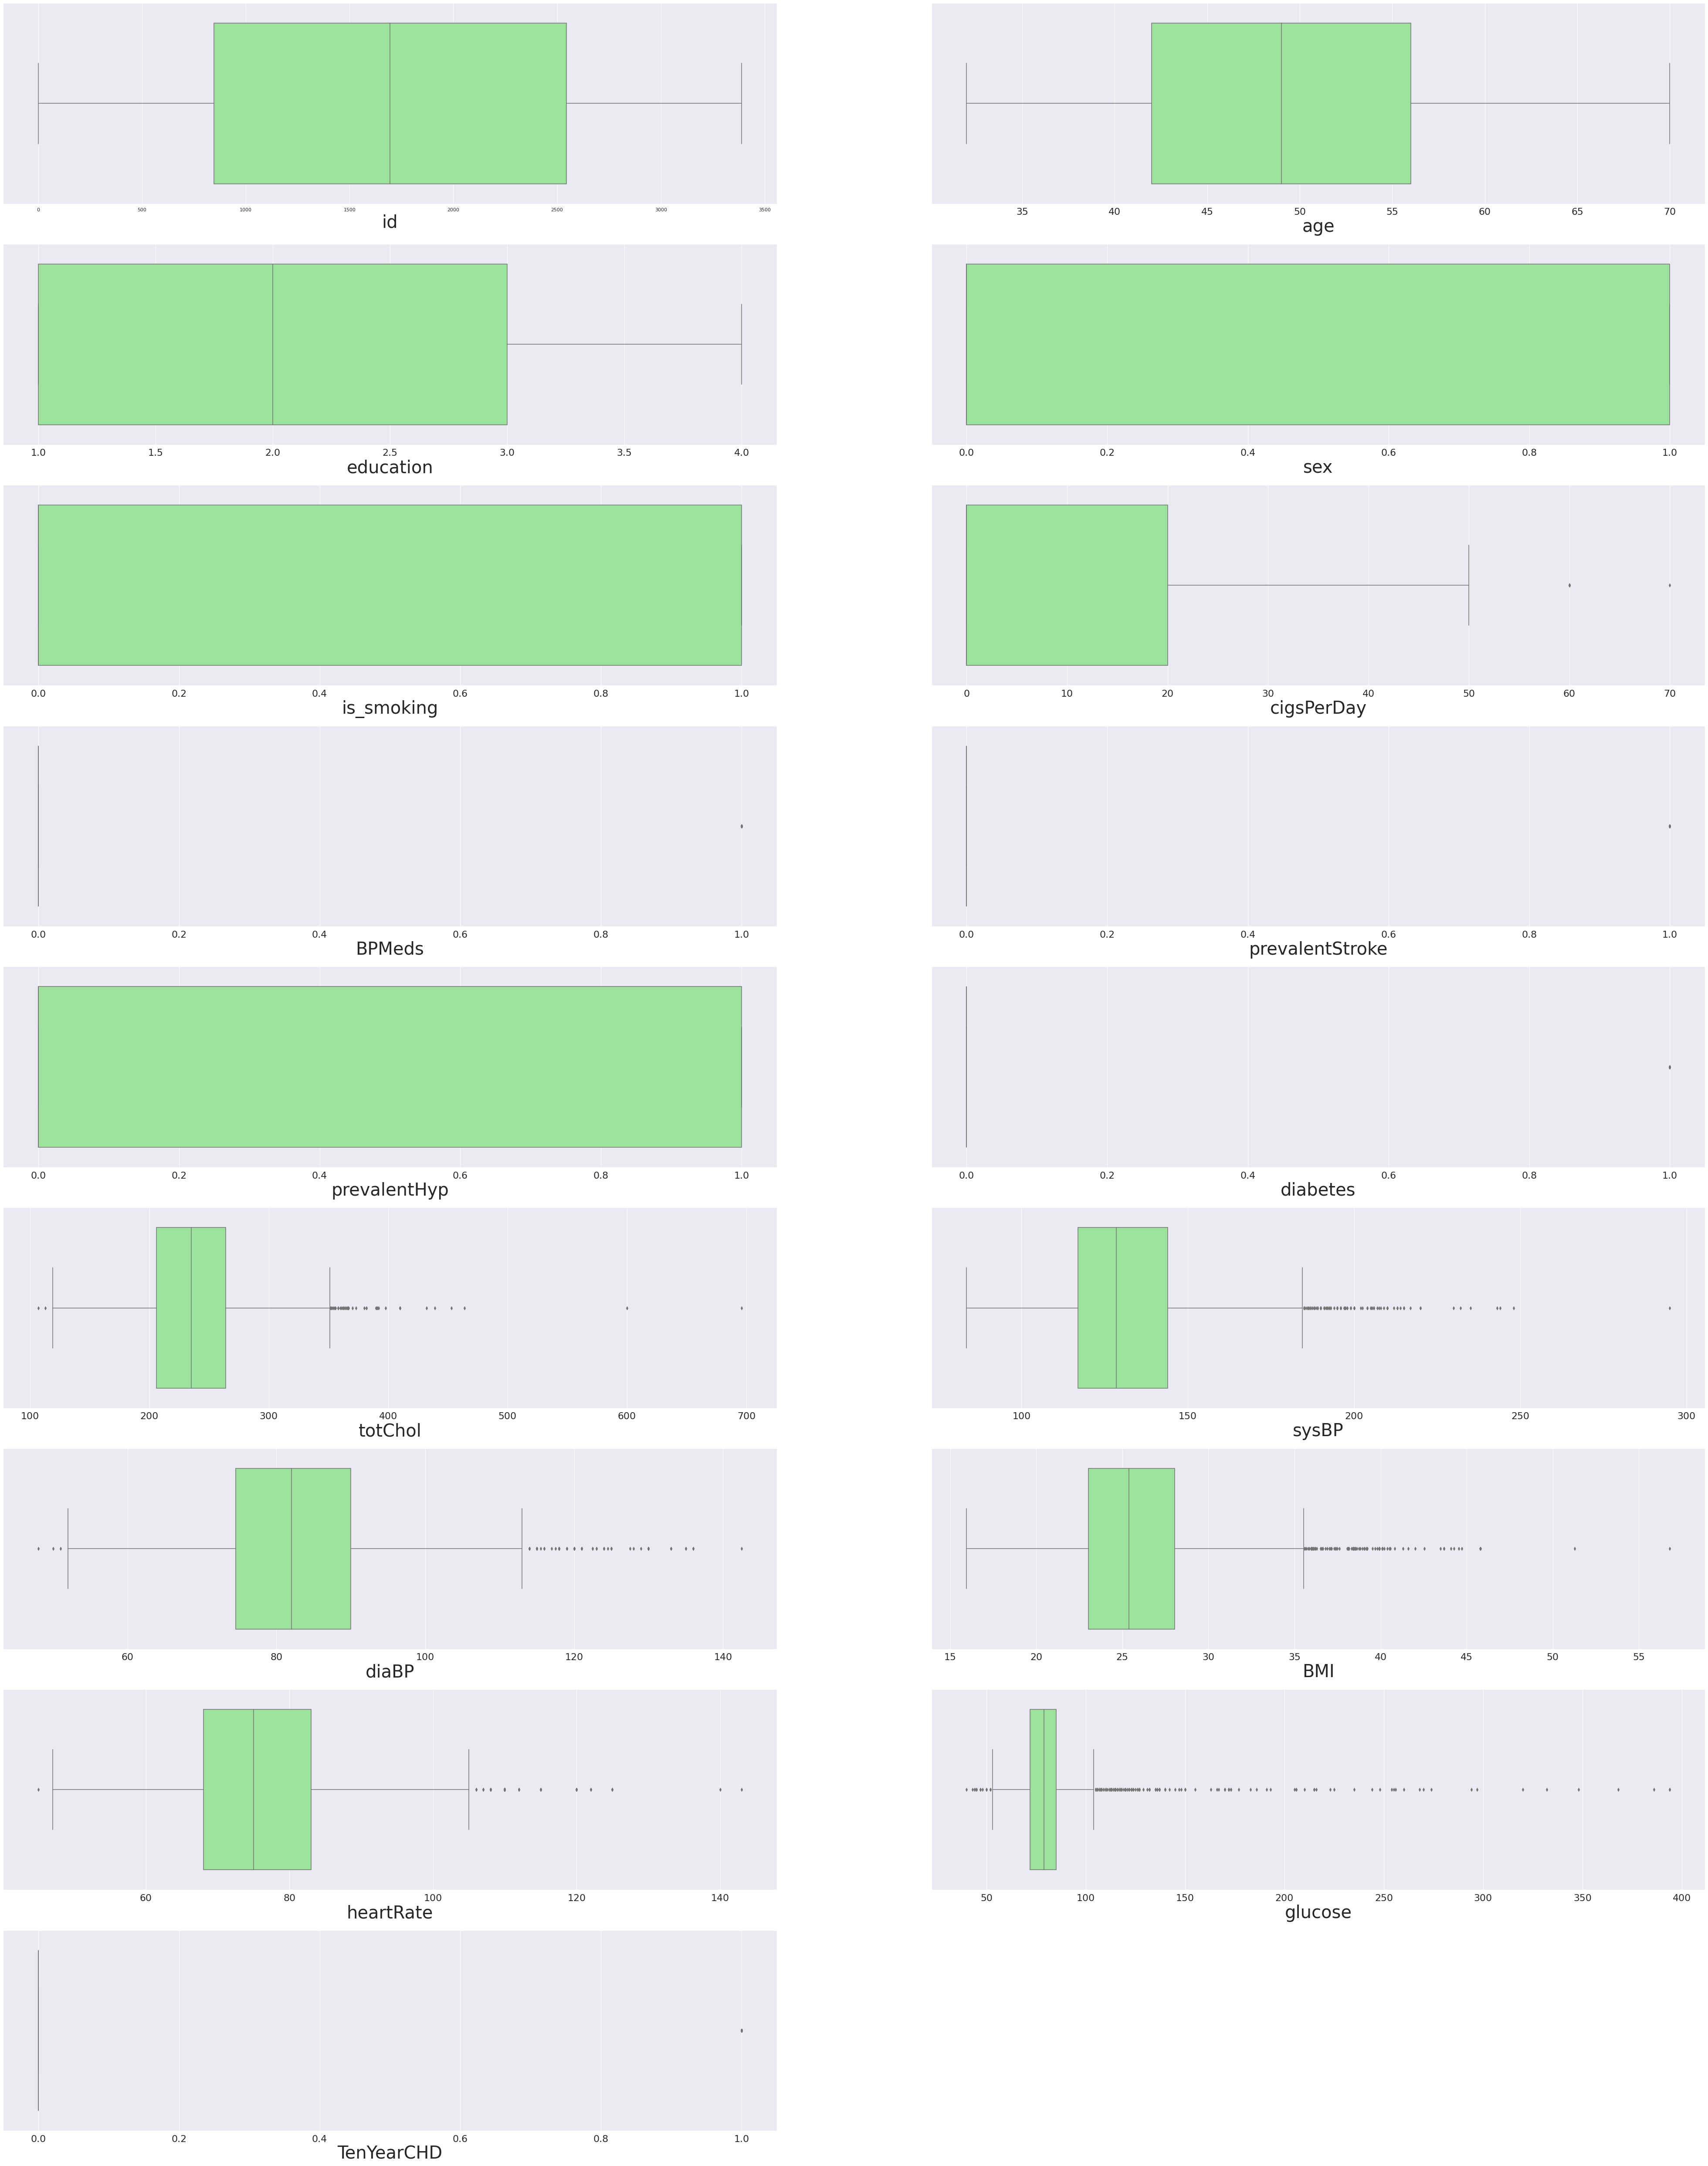

In [19]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='lightgreen')
    plt.xlabel(i[1],fontsize=40)

In [20]:
# Z Score based technique to remove outliers
lst = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

cigsPerDayLower_limit: -26.46
cigsPerDayUpper_limit: 44.67
totCholLower_limit: 102.2
totCholUpper_limit: 372.05
sysBPLower_limit: 65.66
sysBPUpper_limit: 199.69
diaBPLower_limit: 46.81
diaBPUpper_limit: 119.04
BMILower_limit: 13.48
BMIUpper_limit: 38.12
heartRateLower_limit: 40.02
heartRateUpper_limit: 111.95
glucoseLower_limit: 11.8
glucoseUpper_limit: 152.04
